In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import preprocessing

from sklearn.cluster import KMeans

from sklearn import preprocessing

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


import nbimporter
import Building_models_function_to_import

%matplotlib inline

Importing Jupyter notebook from Building_models_function_to_import.ipynb


In [2]:
data_fifa = 'df_stanford_fifa_features'
data_real = 'df_stanford_real_features'



data = 'df_stanford_fifa_features'

seasons = ['2015/2016','2014/2015','2013/2014','2012/2013','2011/2012','2010/2011','2009/2010']
seasons = ['2009/2010']
leagues_id = [21518]





seasons_footdata = [i.replace('/','_').replace('20','') for i in seasons]

dataset_matches = f'data/{data_real}_leagues_{leagues_id}_seasons_{seasons_footdata}.csv'
dataset_fifa = f'data/{data_fifa}_leagues_{leagues_id}_seasons_{seasons_footdata}.csv'



missing_values = ['n/a', 'na', '--', 'nan', 'Nan','NaN', ' ', '-']

df_matches = pd.read_csv(dataset_matches, na_values = missing_values)
df_fifa = pd.read_csv(dataset_fifa, na_values = missing_values)

df_matches.dropna(inplace=True)
df_fifa.dropna(inplace=True)



In [76]:
df_fifa.head()

crossing_home  finishing_home  heading_accuracy_home  short_passing_home  \
0          82.00           90.75                  82.75               86.50   
1          73.75           77.00                  83.25               74.75   
2          74.00           73.75                  78.00               77.25   
3          75.00           75.75                  79.00               77.25   
4          76.00           74.00                  78.00               73.00   

   volleys_home  dribbling_home  curve_home  free_kick_accuracy_home  \
0         83.00           84.00       85.50                    83.75   
1         70.25           78.00       76.00                    79.00   
2         70.50           76.00       75.00                    79.50   
3         70.25           76.00       77.75                    77.50   
4         74.50           74.75       75.75                    71.00   

   long_passing_home  ball_control_home  acceleration_home  sprint_speed_home  \
0               87.8               79.6               81.8               79.0   
1               74.0               74.2               54.4               69.0   
2               72.2               71.4               67.6               75.2   
3               76.0               75.4               70.8               71.8   
4               75.8               74.0               65.8               70.2   

   agility_home  reactions_home  balance_home  shot_power_home  jumping_home  \
0          90.0            89.6          86.6             84.0          87.0   
1          73.0            78.8          79.0             74.4          79.2   
2          77.0            77.0          76.6             74.4          74.2   
3          77.2            81.2          79.8             76.6          75.4   
4          78.2            79.8          79.0             78.0          72.6   

   stamina_home  strength_home  long_shots_home  aggression_home  \
0          80.0           85.2        81.000000             86.8   
1          75.8           71.8        82.800000             81.4   
2          76.2           74.0        80.000000             79.0   
3          82.4           79.2        78.000000             78.6   
4          74.0           76.2        74.666667             76.6   

   interceptions_home  positioning_home  vision_home  penalties_home  \
0                82.2              82.2         79.6            85.8   
1                86.8              68.2         81.2            80.2   
2                75.2              72.4         73.8            76.0   
3                81.2              73.2         76.0            78.2   
4                74.4              68.8         73.8            74.2   

   marking_home  standing_tackle_home  sliding_tackle_home  gk_diving_home  \
0          85.8             85.200000                 87.6            94.0   
1          77.8             76.200000                 71.8            74.0   
2          75.0             76.200000                 67.2            75.0   
3          76.0             77.000000                 74.4            73.0   
4          75.8             77.333333                 73.4            75.0   

   gk_handling_home  gk_kicking_home  gk_positioning_home  gk_reflexes_home  \
0              88.0             91.0                 90.0              96.0   
1              75.0             76.0                 83.0              82.0   
2              69.0             78.0                 77.0              74.0   
3              73.0             76.0                 77.0              72.0   
4              79.0             76.0                 81.0              78.0   

   crossing_away  finishing_away  heading_accuracy_away  short_passing_away  \
0          80.00           75.00                  76.25               81.50   
1          79.00           81.00                  74.75               79.50   
2          73.00           70.50                  70.25               73.75   
3          80.25         

# Feature Engineering

In [77]:
df_matches

id  stage        date home_team_name_id away_team_name_id labels  \
20   22118      3  2009-09-19            coruña          espanyol      A   
21   22121      3  2009-09-19          mallorca          tenerife      H   
22   22122      3  2009-09-19           osasuna           sevilla      A   
23   22126      3  2009-09-19         barcelona         atlmadrid      H   
24   22127      3  2009-09-19            málaga         santander      A   
25   22119      3  2009-09-20            madrid             xerez      H   
26   22120      3  2009-09-20         atlbilbao        villarreal      H   
27   22123      3  2009-09-20          zaragoza        valladolid      A   
28   22124      3  2009-09-20          valencia             gijon      D   
29   22125      3  2009-09-20           almería            getafe      H   
30   22227      4  2009-09-22         santander         barcelona      A   
31   22222      4  2009-09-22           sevilla          mallorca      H   
32   22225      4  2009-09-23            getafe          valencia      H   
33   22221      4  2009-09-23          tenerife         atlbilbao      H   
34   22223      4  2009-09-23        valladolid           osasuna      A   
35   22219      4  2009-09-23             xerez            coruña      A   
36   22226      4  2009-09-23         atlmadrid           almería      D   
37   22220      4  2009-09-23        villarreal            madrid      A   
38   22218      4  2009-09-23          espanyol            málaga      H   
39   22224      4  2009-09-24             gijon          zaragoza      D   
40   22235      5  2009-09-26          valencia         atlmadrid      D   
41   22237      5  2009-09-26            málaga         barcelona      A   
42   22230      5  2009-09-26            madrid          tenerife      H   
43   22231      5  2009-09-26         atlbilbao           sevilla      A   
44   22229      5  2009-09-27            coruña        villarreal      H   
45   22232      5  2009-09-27          mallorca        valladolid      H   
46   22236      5  2009-09-27           almería         santander      D   
47   22234      5  2009-09-27          zaragoza            getafe      H   
48   22228      5  2009-09-27          espanyol             xerez      D   
49   22233      5  2009-09-27           osasuna             gijon      H   
..     ...    ...         ...               ...               ...    ...   
350  22193     36  2010-05-04          valencia             xerez      H   
351  22192     36  2010-05-04           almería        villarreal      H   
352  22188     36  2010-05-04            getafe             gijon      D   
353  22191     36  2010-05-04         barcelona          tenerife      H   
354  22190     36  2010-05-05         santander           sevilla      A   
355  22189     36  2010-05-05         atlmadrid        valladolid      H   
356  22197     36  2010-05-05         atlbilbao            málaga      D   
357  22195     36  2010-05-05           osasuna            coruña      H   
358  22194     36  2010-05-05          zaragoza          espanyol      H   
359  22196     36  2010-05-05          mallorca            madrid      A   
360  22198     37  2010-05-08            getafe            málaga      H   
361  22199     37  2010-05-08             gijon         atlmadrid      D   
362  22200     37  2010-05-08        valladolid         santander      H   
363  22202     37  2010-05-08          tenerife           almería      D   
364  22203     37  2010-05-08        villarreal          valencia      H   
365  22204     37  2010-05-08             xerez          zaragoza      H   
366  22205     37  2010-05-08          espanyol           osasuna      H   
367  22206     37  2010-05-08            coruña          mallorca      H   
368  22207     37  2010-05-08            madrid         atlbilbao      H   
369  22201     37  2010-05-08           sevilla         barcelona      A   
370  22213     38  2010-05-15          zaragoza        v

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 20 to 379
Data columns (total 72 columns):
id                         360 non-null int64
stage                      360 non-null int64
date                       360 non-null datetime64[ns]
home_team_name_id          360 non-null object
away_team_name_id          360 non-null object
labels                     360 non-null object
FTHG_mean                  360 non-null float64
HTHG_mean                  360 non-null float64
HS_mean                    360 non-null float64
HST_mean                   360 non-null float64
HF_mean                    360 non-null float64
HC_mean                    360 non-null float64
HY_mean                    360 non-null float64
HR_mean                    360 non-null float64
H_FTR_A_mean               360 non-null float64
H_FTR_D_mean               360 non-null float64
H_FTR_H_mean               360 non-null float64
H_HTR_A_mean               360 non-null float64
H_HTR_D_mean               360

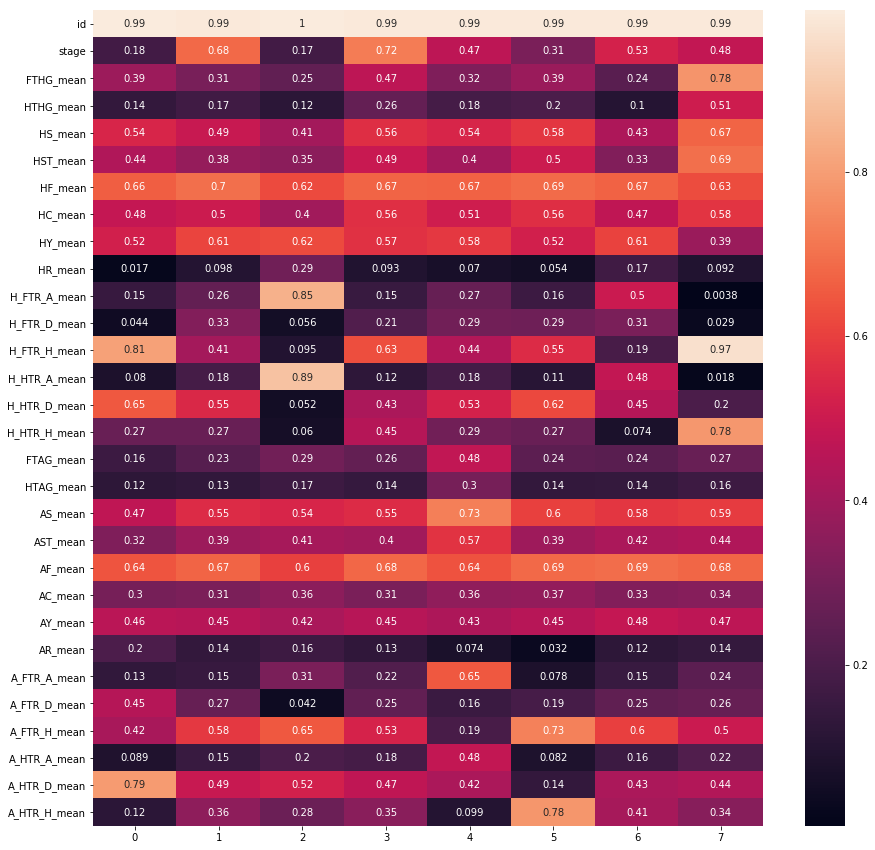

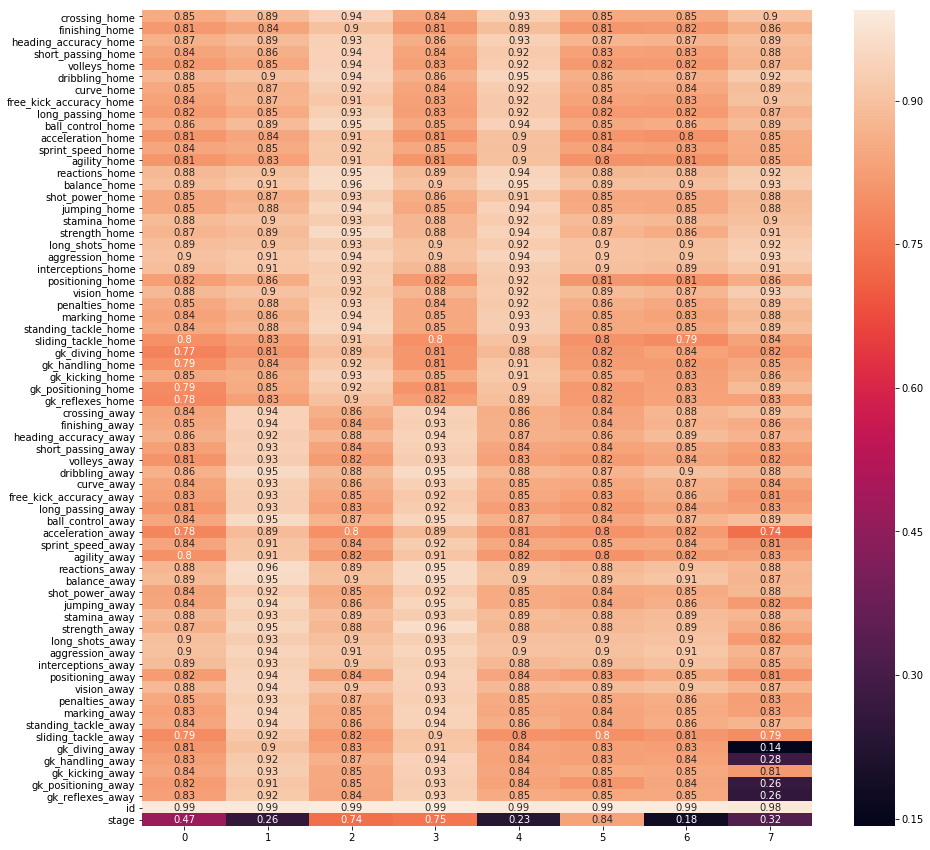

In [78]:
# import nbimporter
# import Building_models_function_to_import

df_stanford_real_features_AfterFE = Building_models_function_to_import.feature_engineering_real_features(df_matches)
df_stanford_fifa_features_AfterFE = Building_models_function_to_import.feature_engineering_fifa_features(df_fifa)


In [79]:
seasons_data = []
for season in seasons:
    seasons_data.append(season.replace('/','_').replace('20',''))

location_to_file = 'data/'
df_stanford_real_features_AfterFE.to_csv(location_to_file+f'df_stanford_real_features_AfterFE_leagues_{leagues_id}_seasons_{seasons_data}.csv',index=False)
df_stanford_fifa_features_AfterFE.to_csv(location_to_file+f'df_stanford_fifa_features_AfterFE_leagues_{leagues_id}_seasons_{seasons_data}.csv',index=False)

In [80]:
df_stanford_real_features_AfterFE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 20 to 379
Data columns (total 72 columns):
id                         360 non-null int64
stage                      360 non-null int64
date                       360 non-null datetime64[ns]
home_team_name_id          360 non-null object
away_team_name_id          360 non-null object
labels                     360 non-null object
FTHG_mean                  360 non-null float64
HTHG_mean                  360 non-null float64
HS_mean                    360 non-null float64
HST_mean                   360 non-null float64
HF_mean                    360 non-null float64
HC_mean                    360 non-null float64
HY_mean                    360 non-null float64
HR_mean                    360 non-null float64
H_FTR_A_mean               360 non-null float64
H_FTR_D_mean               360 non-null float64
H_FTR_H_mean               360 non-null float64
H_HTR_A_mean               360 non-null float64
H_HTR_D_mean               360

In [81]:
pd.set_option('display.max_columns', 5000)
df_stanford_fifa_features_AfterFE.head()

crossing_home  finishing_home  heading_accuracy_home  short_passing_home  \
0          82.00           90.75                  82.75               86.50   
1          73.75           77.00                  83.25               74.75   
2          74.00           73.75                  78.00               77.25   
3          75.00           75.75                  79.00               77.25   
4          76.00           74.00                  78.00               73.00   

   volleys_home  dribbling_home  curve_home  free_kick_accuracy_home  \
0         83.00           84.00       85.50                    83.75   
1         70.25           78.00       76.00                    79.00   
2         70.50           76.00       75.00                    79.50   
3         70.25           76.00       77.75                    77.50   
4         74.50           74.75       75.75                    71.00   

   long_passing_home  ball_control_home  acceleration_home  sprint_speed_home  \
0               87.8               79.6               81.8               79.0   
1               74.0               74.2               54.4               69.0   
2               72.2               71.4               67.6               75.2   
3               76.0               75.4               70.8               71.8   
4               75.8               74.0               65.8               70.2   

   agility_home  reactions_home  balance_home  shot_power_home  jumping_home  \
0          90.0            89.6          86.6             84.0          87.0   
1          73.0            78.8          79.0             74.4          79.2   
2          77.0            77.0          76.6             74.4          74.2   
3          77.2            81.2          79.8             76.6          75.4   
4          78.2            79.8          79.0             78.0          72.6   

   stamina_home  strength_home  long_shots_home  aggression_home  \
0          80.0           85.2        81.000000             86.8   
1          75.8           71.8        82.800000             81.4   
2          76.2           74.0        80.000000             79.0   
3          82.4           79.2        78.000000             78.6   
4          74.0           76.2        74.666667             76.6   

   interceptions_home  positioning_home  vision_home  penalties_home  \
0                82.2              82.2         79.6            85.8   
1                86.8              68.2         81.2            80.2   
2                75.2              72.4         73.8            76.0   
3                81.2              73.2         76.0            78.2   
4                74.4              68.8         73.8            74.2   

   marking_home  standing_tackle_home  sliding_tackle_home  gk_diving_home  \
0          85.8             85.200000                 87.6            94.0   
1          77.8             76.200000                 71.8            74.0   
2          75.0             76.200000                 67.2            75.0   
3          76.0             77.000000                 74.4            73.0   
4          75.8             77.333333                 73.4            75.0   

   gk_handling_home  gk_kicking_home  gk_positioning_home  gk_reflexes_home  \
0              88.0             91.0                 90.0              96.0   
1              75.0             76.0                 83.0              82.0   
2              69.0             78.0                 77.0              74.0   
3              73.0             76.0                 77.0              72.0   
4              79.0             76.0                 81.0              78.0   

   crossing_away  finishing_away  heading_accuracy_away  short_passing_away  \
0          80.00           75.00                  76.25               81.50   
1          79.00           81.00                  74.75               79.50   
2          73.00           70.50                  70.25               73.75   
3          80.25         

In [82]:
df_stanford_fifa_features_AfterFE.columns


Index(['crossing_home', 'finishing_home', 'heading_accuracy_home',
       'short_passing_home', 'volleys_home', 'dribbling_home', 'curve_home',
       'free_kick_accuracy_home', 'long_passing_home', 'ball_control_home',
       ...
       'skill_away', 'movement_home', 'movement_away', 'power_home',
       'power_away', 'mentality_home', 'mentality_away', 'month', 'weekday',
       'year'],
      dtype='object', length=150)